In [74]:
%load_ext autoreload 
%autoreload 2

import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(os.path.join(os.getcwd(), ".."))

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Артем\Desktop\Вуз\Аспирантура\Диссертация\Алгоритм\Relaxation_frequency_phase_algorithm\notebooks\Solo_ms\..


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [75]:
def plot_for_one_F(F_range,phases_arrays, phase_diff_arrays, title=""):
    fig = plt.figure(figsize=(8, 5))
    gs = fig.add_gridspec(2, 1)
    front = 12

    ax1 = fig.add_subplot(gs[0, 0])
    for i in range(0,len(F_range),1):
        label_name = F_range[i]
        ax1.plot(
            phases_arrays[i],
            np.abs(phase_diff_arrays[i]),
            label=label_name,
            linewidth=2
        )

    ax1.set_xlabel('Phase shift, °', fontsize=front)
    ax1.set_ylabel('Phase measurement deviation, °', fontsize=front)
    ax1.tick_params(axis='both', labelsize=front)
    ax1.grid(True)
    ax1.legend(fontsize=10)

    ax1.set_title(title, fontsize=front + 2)
    plt.tight_layout()
    plt.show()

In [76]:
def variate_F_phase(phase_method):
    F_range=[]
    phases_arrays = []
    phase_diff_arrays = []

    for F in range(int(300e3), int(490e3), int(10e3)):
        F_range.append(F)
        print(F)
        currant_phases=[]
        current_difs=[]
        for phase in range(1, 180, 1):
            duration = 100e-6
            fs = F * 100

            t = np.linspace(0, duration, int(duration * fs))
            U = md.generate_sin(t, F, 2)
            I = md.generate_sin(t, F, 2, phase)

            # Вызов метода напрямую
            time, phase_d = phase_method(t, U, I, F)

            phase_kde = md.get_kde_mode(phase_d)

            currant_phases.append(phase)
            current_difs.append(abs(phase_kde)-abs(phase))
            print("Phase="+str(phase)+" KDE="+str(phase_kde))

        phases_arrays.append(currant_phases)
        phase_diff_arrays.append(current_difs)

    return F_range,phases_arrays, phase_diff_arrays

300000
Phase=1 KDE=-0.9998984522892315
Phase=2 KDE=-2.0010343145102656
Phase=3 KDE=-3.0005378446299438
Phase=4 KDE=-3.9973991999855953
Phase=5 KDE=-4.992217390693835
Phase=6 KDE=-5.987616464484
Phase=7 KDE=-6.981859257522684
Phase=8 KDE=-7.973747738516247
Phase=9 KDE=-8.963892919965959
Phase=10 KDE=-9.955731159002744
Phase=11 KDE=-10.945074573515106
Phase=12 KDE=-11.932317302976156
Phase=13 KDE=-12.919257614200864
Phase=14 KDE=-13.906402258987768
Phase=15 KDE=-14.891130605113673
Phase=16 KDE=-15.874100973002484
Phase=17 KDE=-16.858064764718474
Phase=18 KDE=-17.84069769499753
Phase=19 KDE=-18.821267468065592
Phase=20 KDE=-19.800302876265587
Phase=21 KDE=-20.781382389934446
Phase=22 KDE=-21.760042979031333
Phase=23 KDE=-22.736882871784207
Phase=24 KDE=-23.713691993215512
Phase=25 KDE=-24.69089258024801
Phase=26 KDE=-25.666042602282293
Phase=27 KDE=-26.639592062648298
Phase=28 KDE=-27.61430944038645
Phase=29 KDE=-28.58823923779525
Phase=30 KDE=-29.560346095466652
Phase=31 KDE=-30.53122654

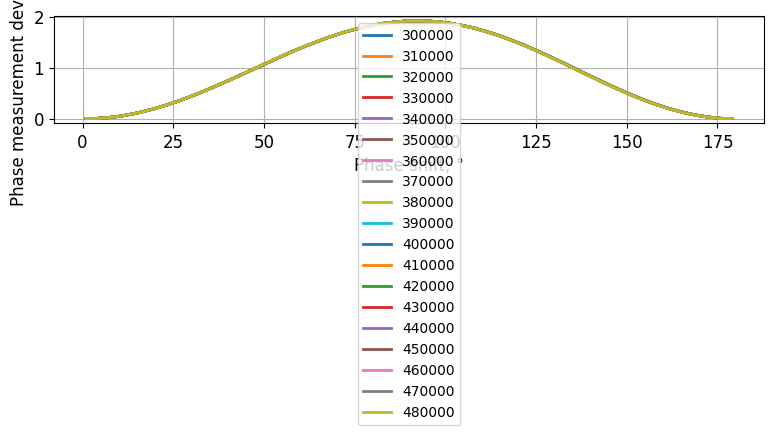

In [77]:
F_range,phases_arrays, phase_diff_arrays=variate_F_phase(md.get_phase_xcorr3)
plot_for_one_F(F_range,phases_arrays, phase_diff_arrays)

In [78]:
def average_mse(arrays):
    """
    arrays: список numpy-массивов одинаковой длины
    """
    first = arrays[0]
    mses = []

    for arr in arrays[1:]:
        mse = np.mean((first - arr) ** 2)
        mses.append(mse)

    return np.mean(mses)

arrays = np.array(phase_diff_arrays)

result = average_mse(arrays)
print(result)

3.774426182965648e-06
